In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

### Class Distrubution

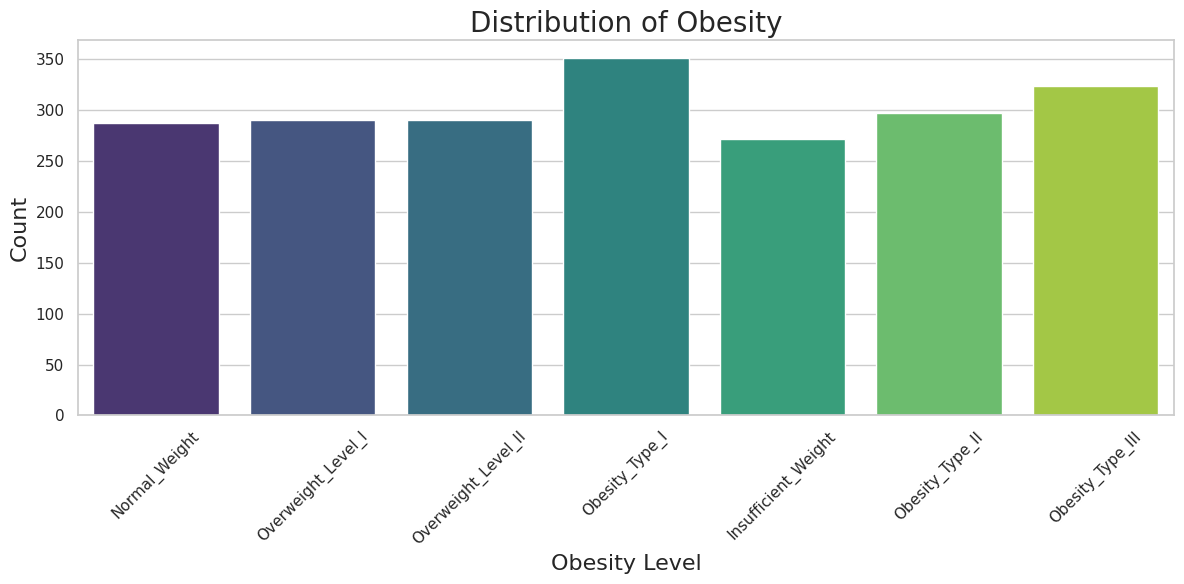

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(x='NObeyesdad',data=df ,palette='viridis', hue='NObeyesdad')
plt.title('Distribution of Obesity',fontsize=20)
plt.xlabel('Obesity Level',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histogram (Age Distrubution)

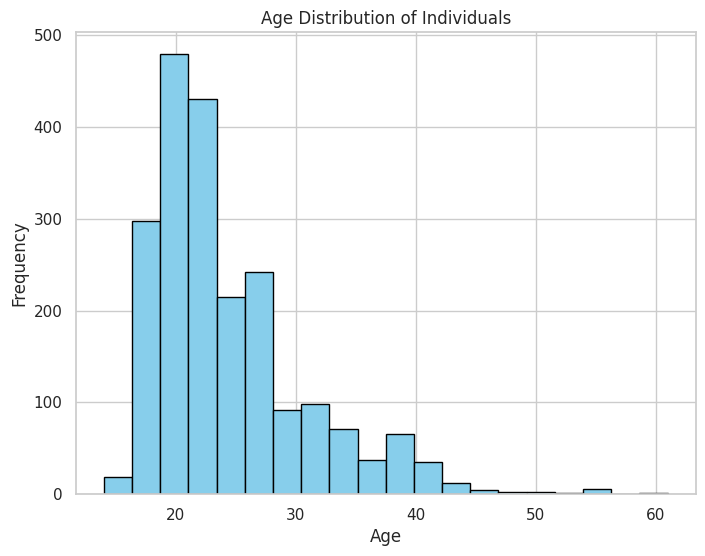

In [5]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap

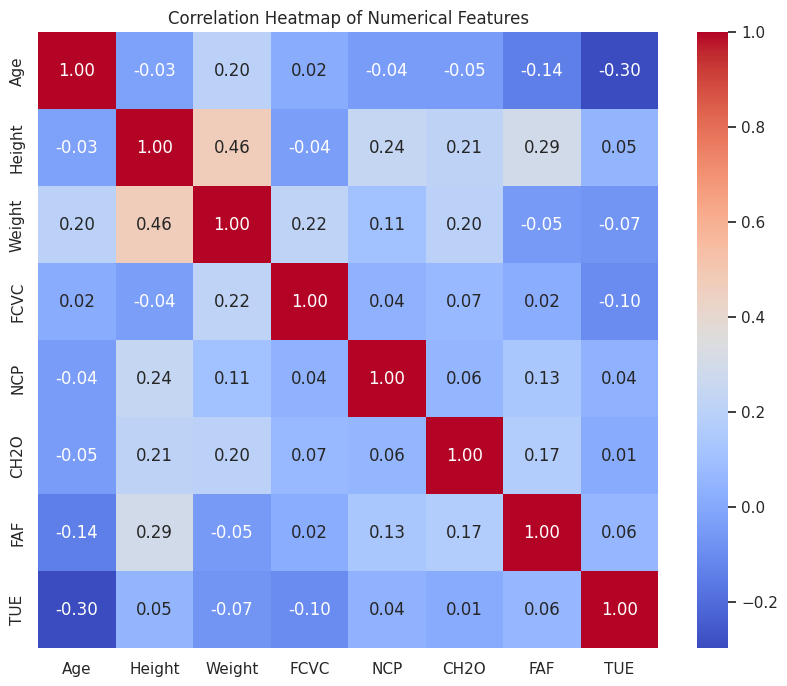

In [6]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Boxplot

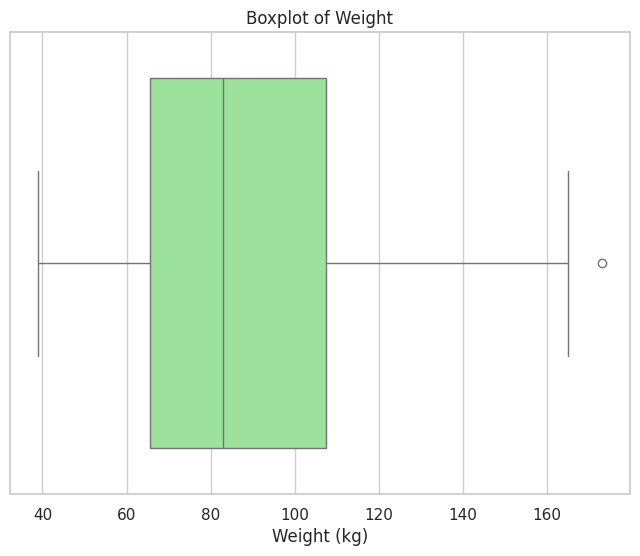

In [7]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Weight'], color='lightgreen')
plt.title('Boxplot of Weight')
plt.xlabel('Weight (kg)')
plt.show()

### ScatterPlot

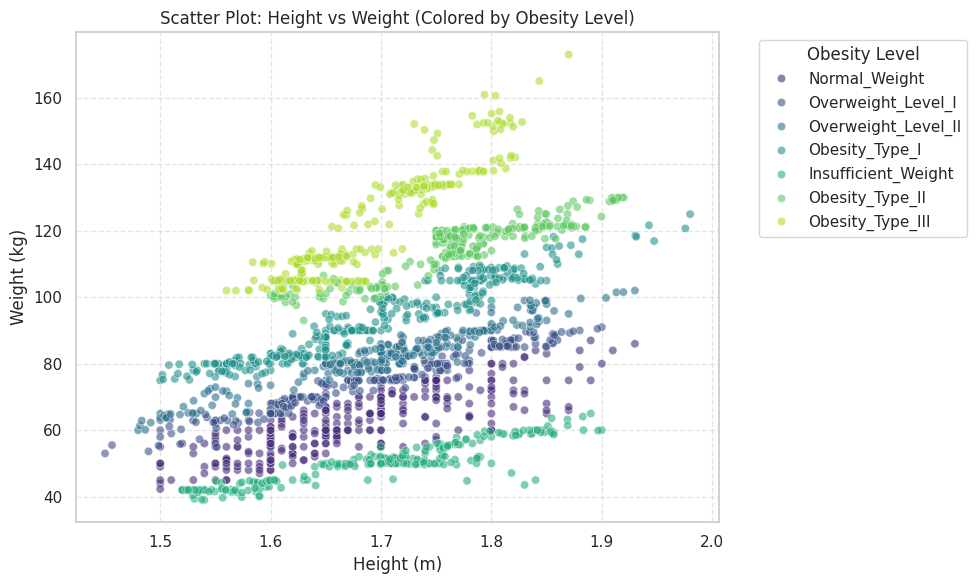

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='viridis', alpha=0.6)
plt.title('Scatter Plot: Height vs Weight (Colored by Obesity Level)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Obesity Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

In [9]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

ordinal_cols = ['CAEC', 'CALC']
ordinal_order = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently', 'Always']
]

nominal_cols = ['MTRANS', 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', ]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('ord', OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_cols)
    ])

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9314420803782506

                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        54
      Normal_Weight       0.89      0.83      0.86        58
     Obesity_Type_I       0.88      0.99      0.93        70
    Obesity_Type_II       0.98      0.93      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.84      0.91      0.88        58
Overweight_Level_II       0.98      0.90      0.94        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9432624113475178

                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.83      0.91      0.87        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.88      0.90      0.89        58
Overweight_Level_II       0.95      0.93      0.94        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.94      0.94       423



## Support Vector Machine

In [13]:
from sklearn.svm import SVC
svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=100, kernel='rbf', gamma='scale', random_state=42))
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9550827423167849


## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=100, solver='lbfgs', max_iter=1000, random_state=42))
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9645390070921985
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        54
      Normal_Weight       0.96      0.93      0.95        58
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.90      0.93      0.92        58
Overweight_Level_II       0.95      0.93      0.94        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.97      0.96      0.96       423



### Evaluation Metrics Comparison

In [15]:
results = []
model_preds = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}
for name, y_pred in model_preds.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Algorithm": name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1-Score (Macro)": report['macro avg']['f1-score']
    })
comparison_df = pd.DataFrame(results).sort_values(by="Accuracy Score", ascending=False)
print("\nFinal Comparative Analysis Table:")
print(comparison_df)


Final Comparative Analysis Table:
             Algorithm  Accuracy Score  Precision (Macro)  Recall (Macro)  \
0  Logistic Regression        0.964539           0.963383        0.964164   
3                  SVM        0.955083           0.954836        0.953424   
2        Random Forest        0.943262           0.944457        0.941771   
1        Decision Tree        0.931442           0.934475        0.929222   

   F1-Score (Macro)  
0          0.963562  
3          0.953999  
2          0.942574  
1          0.930717  


# Prediction Program

In [17]:
def predict_interactive():
    print("Enter your details: \n")

    # 1. Collect User Inputs Interactively
    try:
        gender = input("Gender (Male/Female): ").strip()
        age = float(input("Age (e.g., 25): "))
        height = float(input("Height in meters (e.g., 1.75): "))
        weight = float(input("Weight in kg (e.g., 80): "))
        family_hist = input("Family History of Overweight (yes/no): ").strip()
        favc = input("Do you eat high caloric food frequently? (yes/no): ").strip()
        fcvc = float(input("How often do you eat veggies? (1=Rarely, 2=Sometimes, 3=Always): "))
        ncp = float(input("How many main meals a day? (1, 2, 3, 4): "))
        caec = input("Do you eat between meals? (no, Sometimes, Frequently, Always): ").strip()
        smoke = input("Do you smoke? (yes/no): ").strip()
        ch2o = float(input("Daily Water intake in liters (1, 2, 3): "))
        scc = input("Do you monitor calories? (yes/no): ").strip()
        faf = float(input("Physical Activity Frequency (0=None, 1=1-2 days, 2=2-4 days, 3=4+ days): "))
        tue = float(input("Time using technology daily (0=0-2h, 1=3-5h, 2=5+h): "))
        calc = input("Alcohol consumption? (no, Sometimes, Frequently, Always): ").strip()
        mtrans = input("Transport? (Automobile, Motorbike, Bike, Public_Transportation, Walking): ").strip()
    except ValueError:
        print("\n Please enter valid numbers for Age, Height, Weight, etc.")
        return

    # 2. Organize Data
    input_data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'family_history_with_overweight': [family_hist],
        'FAVC': [favc],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'CH2O': [ch2o],
        'SCC': [scc],
        'FAF': [faf],
        'TUE': [tue],
        'CALC': [calc],
        'MTRANS': [mtrans]
    })

    models = {
        "Random Forest      ": rf_model,
        "Decision Tree      ": dt_model,
        "SVM (Support Vector)": svm_model,
        "Logistic Regression": lr_model
    }


    print("-"*40)
    print(" Predictions by Models: ")

    for name, model in models.items():
        prediction = model.predict(input_data)[0]
        print(f"{name} : {prediction}")

predict_interactive()

Enter your details: 

----------------------------------------
 Predictions by Models: 
Random Forest       : Normal_Weight
Decision Tree       : Normal_Weight
SVM (Support Vector) : Normal_Weight
Logistic Regression : Normal_Weight


## Confusion Matrix

<Figure size 800x600 with 0 Axes>

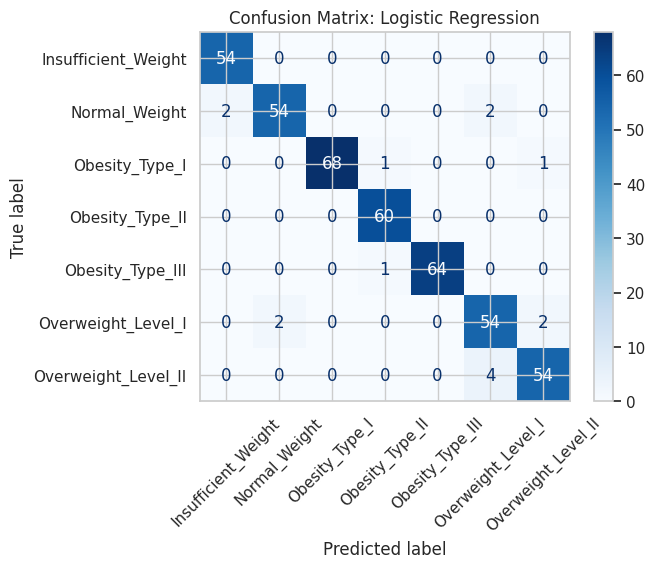

<Figure size 800x600 with 0 Axes>

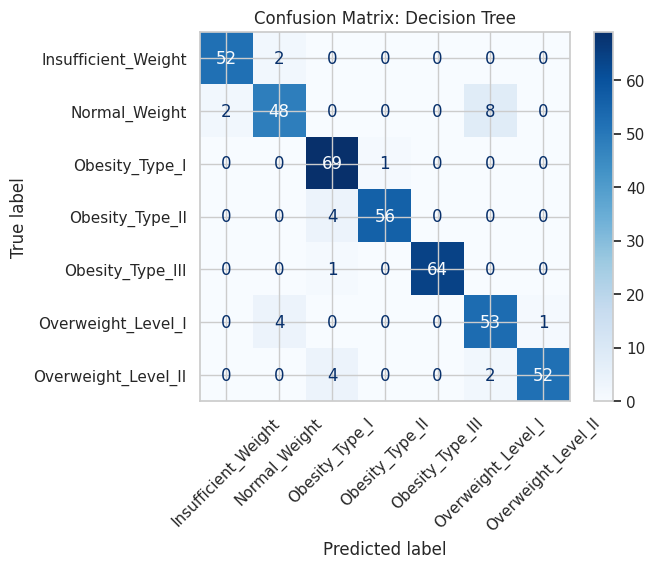

<Figure size 800x600 with 0 Axes>

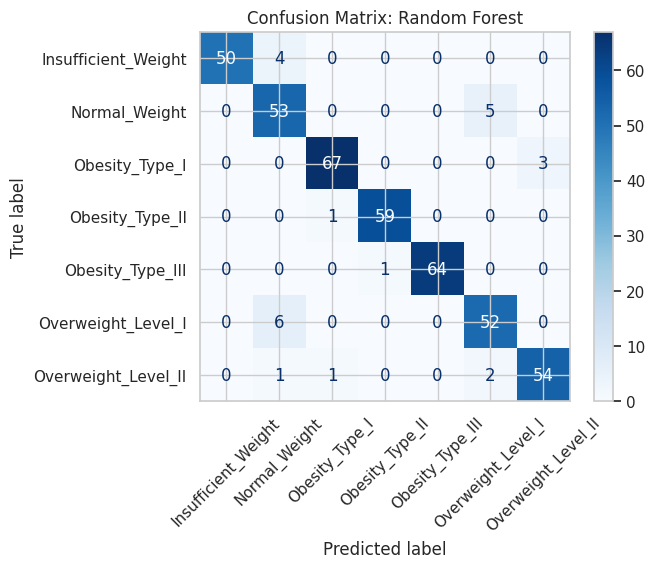

<Figure size 800x600 with 0 Axes>

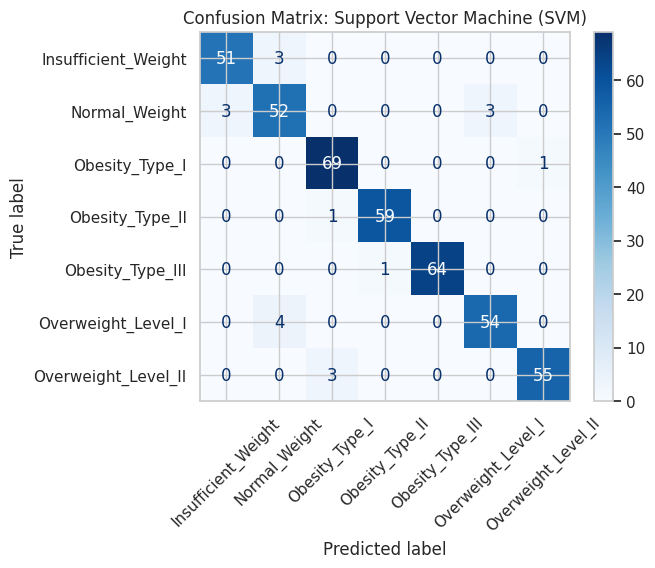

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Support Vector Machine (SVM)": svm_model
}

for name, model in models.items():
    plt.figure(figsize=(8, 6))

    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap='Blues',
        xticks_rotation=45
    )

    plt.title(f"Confusion Matrix: {name}")
    plt.show()